In [ ]:
# install tensorflow
!pip install --upgrade pip
!pip install tensorflow

In [2]:
import tensorflow as tf
x=tf.constant(1.0)
y=tf.constant(2.0)
z=x+y
print(z)

tf.Tensor(3.0, shape=(), dtype=float32)


In [3]:
x*y

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [4]:
tf.__version__

'2.18.0'

In [5]:
hello=tf.constant("hello world")
print(hello)

tf.Tensor(b'hello world', shape=(), dtype=string)


In [6]:
node1=tf.constant(5,dtype=tf.float32)
node2=tf.constant(6.0,dtype=tf.float32)
node3=tf.add(node1,node2)
print(node3)


tf.Tensor(11.0, shape=(), dtype=float32)


In [7]:
A=tf.Variable(initial_value=([[1,2,3],[3,5,7]]),shape=(2,3),dtype=tf.float32,name="A")
print(A.numpy())
print(A.shape)
print(tf.rank(A))


[[1. 2. 3.]
 [3. 5. 7.]]
(2, 3)
tf.Tensor(2, shape=(), dtype=int32)


In [8]:
b=tf.Variable([[1],[2],[3],[4]])
print(tf.shape(b))
print(tf.rank(b))

tf.Tensor([4 1], shape=(2,), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


Linear Regression in tensorflow

In [9]:
w=tf.Variable([0.3],dtype=tf.float32)
b=tf.Variable([-0.3],dtype=tf.float32)

x=tf.Variable([5.0],dtype=tf.float32)

y=w*x+b
print(y)

tf.Tensor([1.2], shape=(1,), dtype=float32)


In [10]:
# prompt: train_X=[]
# train_y=[]
# generate 100 numbers inside them and return them

import random

def generate_random_numbers(count):
  """Generates a list of random integers."""
  return [random.randint(0, 1000) for _ in range(count)]

train_X = generate_random_numbers(100)
train_y = generate_random_numbers(100)




In [11]:
NUM_EXM=len(train_X)
print(NUM_EXM)

100


In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

W = tf.Variable(0.)
B = tf.Variable(0.)

# training info
train_steps = 100
learning_rate = 0.01


loss_history = []

for i in range(train_steps):
    with tf.GradientTape() as tape:
        y_pred = W * train_X*2 + B
        loss = tf.reduce_mean(tf.square(y_pred - train_y))

    dW, dB = tape.gradient(loss, [W, B])
    W.assign_sub(learning_rate * dW)
    B.assign_sub(learning_rate * dB)


    loss_history.append(loss.numpy())

    if i %1 == 0:
        print("loss at step {:03d}: {:.3f}".format(i, loss))




loss at step 000: 337722.594
loss at step 001: 99004968861696.000
loss at step 002: 51481246319222580051968.000
loss at step 003: 26769558744439833619104278773760.000
loss at step 004: inf
loss at step 005: inf
loss at step 006: inf
loss at step 007: inf
loss at step 008: inf
loss at step 009: inf
loss at step 010: nan
loss at step 011: nan
loss at step 012: nan
loss at step 013: nan
loss at step 014: nan
loss at step 015: nan
loss at step 016: nan
loss at step 017: nan
loss at step 018: nan
loss at step 019: nan
loss at step 020: nan
loss at step 021: nan
loss at step 022: nan
loss at step 023: nan
loss at step 024: nan
loss at step 025: nan
loss at step 026: nan
loss at step 027: nan
loss at step 028: nan
loss at step 029: nan
loss at step 030: nan
loss at step 031: nan
loss at step 032: nan
loss at step 033: nan
loss at step 034: nan
loss at step 035: nan
loss at step 036: nan
loss at step 037: nan
loss at step 038: nan
loss at step 039: nan
loss at step 040: nan
loss at step 041: n

MNIST CNN implementation

In [13]:
mnist=tf.keras.datasets.mnist
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [14]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
predictions=model(X_train[:1])
print(predictions)

tf.Tensor(
[[  40.705833    75.356445   147.97319     32.61125   -143.60057
    51.741486   116.41696    -38.857162    -0.8414087   57.144855 ]], shape=(1, 10), dtype=float32)


In [16]:
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss(Y_train[:1],predictions).numpy()

np.float32(96.231705)

In [17]:
model.compile(optimizer="adam",loss=loss,metrics=["accuracy"])

In [18]:
model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6930 - loss: 7.3364
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8330 - loss: 0.6584
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8676 - loss: 0.5080
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8862 - loss: 0.4363
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8980 - loss: 0.3873


In [19]:
model.evaluate(X_test,Y_test,verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9352 - loss: 0.3147


[0.31465938687324524, 0.9351999759674072]

Cats vs Dogs CNN

In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/microsoft-catsvsdogs-dataset


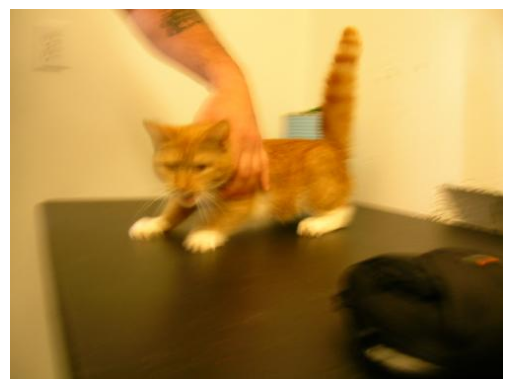

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/0.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()


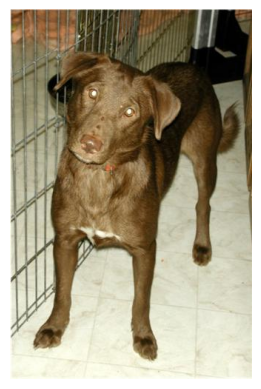

In [22]:
image=mpimg.imread('/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
import os
from PIL import Image
import shutil
import random
from tqdm.notebook import tqdm

source_dir = '/kaggle/input/microsoft-catsvsdogs-dataset/PetImages'
clean_dir = '/kaggle/working/CleanPetImages'
test_dir = '/kaggle/working/Test'

os.makedirs(os.path.join(clean_dir, "Cat"), exist_ok=True)
os.makedirs(os.path.join(clean_dir, "Dog"), exist_ok=True)
os.makedirs(os.path.join(test_dir, "Cat"), exist_ok=True)
os.makedirs(os.path.join(test_dir, "Dog"), exist_ok=True)

for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join(source_dir, folder_name)
    files = os.listdir(folder_path)
    random.shuffle(files)
    test_files = files[:10]
    for fname in tqdm(test_files, desc=f"Copying test {folder_name}"):
        fpath = os.path.join(folder_path, fname)
        try:
            with Image.open(fpath) as img:
                img.verify()
            shutil.copy(fpath, os.path.join(test_dir, folder_name, fname))
        except:
            pass
    for fname in tqdm(files[10:], desc=f"Copying train/val {folder_name}"):
        fpath = os.path.join(folder_path, fname)
        try:
            with Image.open(fpath) as img:
                img.verify()
            shutil.copy(fpath, os.path.join(clean_dir, folder_name, fname))
        except:
            pass

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    clean_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    clean_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

print("Training batches:", len(train_generator))
print("Validation batches:", len(validation_generator))
print("Testing batches:", len(test_generator))


Shape of images batch: (32, 150, 150, 3)
Shape of labels batch: (32,)


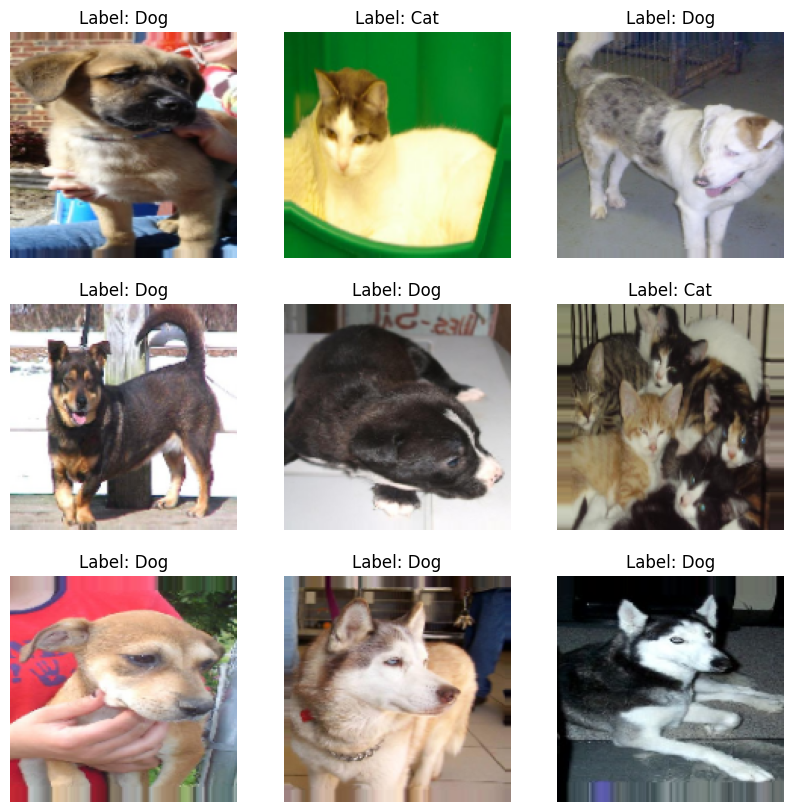

In [24]:
images, labels = next(train_generator)

print("Shape of images batch:", images.shape)
print("Shape of labels batch:", labels.shape)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title("Label: {}".format("Dog" if labels[i] == 1 else "Cat"))
    plt.axis('off')
plt.show()


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,994,305 (7.61 MB)

 Trainable params: 1,994,305 (7.61 MB)

 Non-trainable params: 0 (0.00 B)

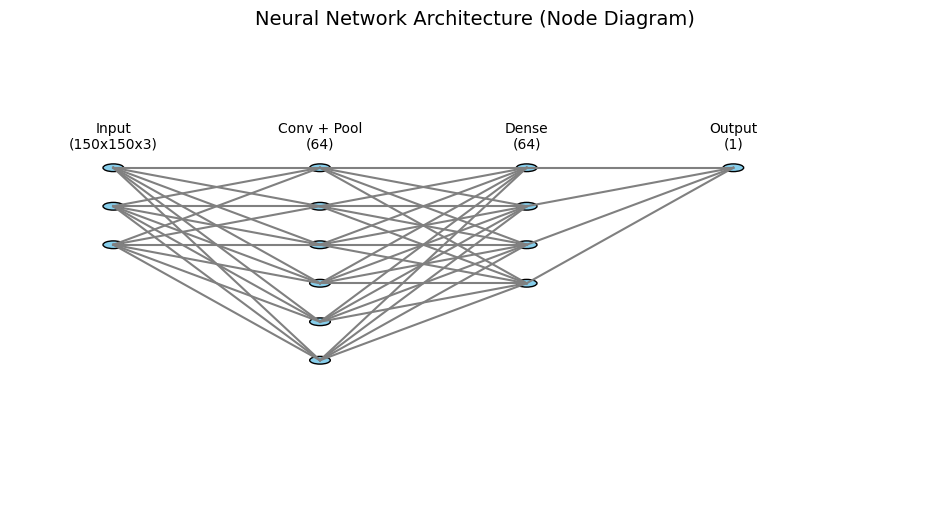

In [26]:
#AI generated

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

fig, ax = plt.subplots(figsize=(12, 6))

layer_sizes = [3, 6, 4, 1]
layer_labels = ["Input\n(150x150x3)", "Conv + Pool\n(64)", "Dense\n(64)", "Output\n(1)"]

v_spacing = 1.0
h_spacing = 2.0

max_layer_size = max(layer_sizes)

for i, (layer_size, label) in enumerate(zip(layer_sizes, layer_labels)):
    layer_top = v_spacing * (max_layer_size - 1) / 2.0
    for j in range(layer_size):
        circle = plt.Circle((i * h_spacing, layer_top - j * v_spacing),
                            radius=0.1, fill=True, color='skyblue', ec='black')
        ax.add_patch(circle)
    ax.text(i * h_spacing, layer_top + 0.5, label, ha='center', fontsize=10)

for i in range(len(layer_sizes) - 1):
    layer1_size = layer_sizes[i]
    layer2_size = layer_sizes[i + 1]
    layer1_top = v_spacing * (max_layer_size - 1) / 2.0
    layer2_top = v_spacing * (max_layer_size - 1) / 2.0
    for j in range(layer1_size):
        for k in range(layer2_size):
            line = plt.Line2D([i * h_spacing, (i + 1) * h_spacing],
                              [layer1_top - j * v_spacing, layer2_top - k * v_spacing],
                              c='gray')
            ax.add_line(line)

ax.set_xlim(-1, len(layer_sizes) * h_spacing)
ax.set_ylim(-max_layer_size, max_layer_size)
ax.axis('off')

plt.title('Neural Network Architecture (Node Diagram)', fontsize=14)
plt.show()


In [27]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 170s 265ms/step - accuracy: 0.5416 - loss: 0.6872 - val_accuracy: 0.7075 - val_loss: 0.5754
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 260ms/step - accuracy: 0.7086 - loss: 0.5720 - val_accuracy: 0.7807 - val_loss: 0.4665
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 259ms/step - accuracy: 0.7767 - loss: 0.4774 - val_accuracy: 0.8221 - val_loss: 0.3968
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 277ms/step - accuracy: 0.8072 - loss: 0.4232 - val_accuracy: 0.7995 - val_loss: 0.4253
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 172s 275ms/step - accuracy: 0.8375 - loss: 0.3731 - val_accuracy: 0.8353 - val_loss: 0.3636
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 163s 261ms/step - accuracy: 0.8552 - loss: 0.3425 - val_accuracy: 0.8635 - val_loss: 0.3238
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 168s 269ms/step - accuracy: 0.8705 - loss: 0.3008 - val_accuracy: 0.8721 - val_loss: 0.3343
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 266ms/step - accuracy: 0.8798 -

In [28]:
model.save("/content/cats_vs_dogs_model.keras")

In [33]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/kaggle/working/Test/Dog/10293.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


In [34]:
prediction = model.predict(img_array)
print("Raw output:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Raw output: [[0.99473333]]


In [35]:
if prediction[0][0] > 0.5:
    print("It's a DOG")
else:
    print("It's a CAT")


It's a DOG
